# Python 数据类型
> Guido 对语言设计美学的深入理解让人震惊。我认识不少很不错的编程语言设计者，他们设计出来的东西确实很精彩，但是从来都不会有用户。Guido 知道如何在理论上做出一定妥协，设计出来的语言让使用者觉得如沐春风，这真是不可多得。  
> ——Jim Hugunin  
>   Jython 的作者，AspectJ 的作者之一，.NET DLR 架构师


Python 最好的品质之一是**一致性**：你可以轻松理解 Python 语言，并通过 Python 的语言特性在类上定义**规范的接口**，来支持 Python 的核心语言特性，从而写出具有“Python 风格”的对象。  

Python 解释器在碰到特殊的句法时，会使用特殊方法（我们称之为魔术方法）去激活一些基本的对象操作。
> `__getitem__` 以双下划线开头的特殊方法，称为 dunder-getitem。特殊方法也称为双下方法(dunder-method)

如 `my_c[key]` 语句执行时，就会调用 `my_c.__getitem__` 函数。这些特殊方法名能让你自己的对象实现和支持一下的语言构架，并与之交互：
* 迭代
* 集合类
* 属性访问
* 运算符重载
* 函数和方法的调用
* 对象的创建和销毁
* 字符串表示形式和格式化
* 管理上下文（即 `with` 块）

## 实现一个 Pythonic 的牌组

In [7]:
# 通过实现魔术方法，来让内置函数支持你的自定义对象
# https://github.com/fluentpython/example-code/blob/master/01-data-model/frenchdeck.py
import collections
import random

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]
        
deck = FrenchDeck()

可以容易地获得一个纸牌对象

In [ ]:
beer_card = Card('7', 'diamonds')
print(beer_card)

和标准 Python 集合类型一样，使用 `len()` 查看一叠纸牌有多少张

In [ ]:
deck = FrenchDeck()
# 实现 __len__ 以支持下标操作
print(len(deck))

可选取特定一张纸牌，这是由 `__getitem__` 方法提供的

In [ ]:
# 实现 __getitem__ 以支持下标操作
print(deck[1])
print(deck[5::13])

随机抽取一张纸牌，使用 python 内置函数 `random.choice`

In [ ]:
from random import choice
# 可以多运行几次观察
choice(deck)

实现特殊方法的两个好处：
- 对于标准操作有固定命名
- 更方便利用 Python 标准库

`__getitem__` 方法把 [] 操作交给了 `self._cards` 列表，deck 类自动支持切片操作

In [ ]:
deck[12::13]
deck[:3]

同时 deck 类支持迭代

In [ ]:
for card in deck:
    print(card)
    
# 反向迭代
for card in reversed(deck):
    print(card)

迭代通常是隐式的，如果一个集合没有实现 `__contains__` 方法，那么 in 运算符会顺序做一次迭代搜索。

In [10]:
Card('Q', 'hearts') in deck 
Card('7', 'beasts') in deck

False

进行排序，排序规则：
2 最小，A最大。花色 黑桃 > 红桃 > 方块 > 梅花

In [16]:
card.rank

'A'

In [ ]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    
    return rank_value * len(suit_values) + suit_values[card.suit]

for card in sorted(deck, key=spades_high):
    print(card)

FrenchDeck 继承了 object 类。通过 `__len__`, `__getitem__` 方法，FrenchDeck和 Python 自有序列数据类型一样，可体现 Python 核心语言特性（如迭代和切片），

Python 支持的所有魔术方法，可以参见 Python 文档 [Data Model](https://docs.python.org/3/reference/datamodel.html) 部分。

比较重要的一点：不要把 `len`，`str` 等看成一个 Python 普通方法：由于这些操作的频繁程度非常高，所以 Python 对这些方法做了特殊的实现：它可以让 Python 的内置数据结构走后门以提高效率；但对于自定义的数据结构，又可以在对象上使用通用的接口来完成相应工作。但在代码编写者看来，`len(deck)` 和 `len([1,2,3])` 两个实现可能差之千里的操作，在 Python 语法层面上是高度一致的。



## 如何使用特殊方法

特殊方法的存在是为了被 Python 解释器调用
除非大量元编程，通常代码无需直接使用特殊方法
通过内置函数来使用特殊方法是最好的选择

### 模拟数值类型
实现一个二维向量（Vector）类

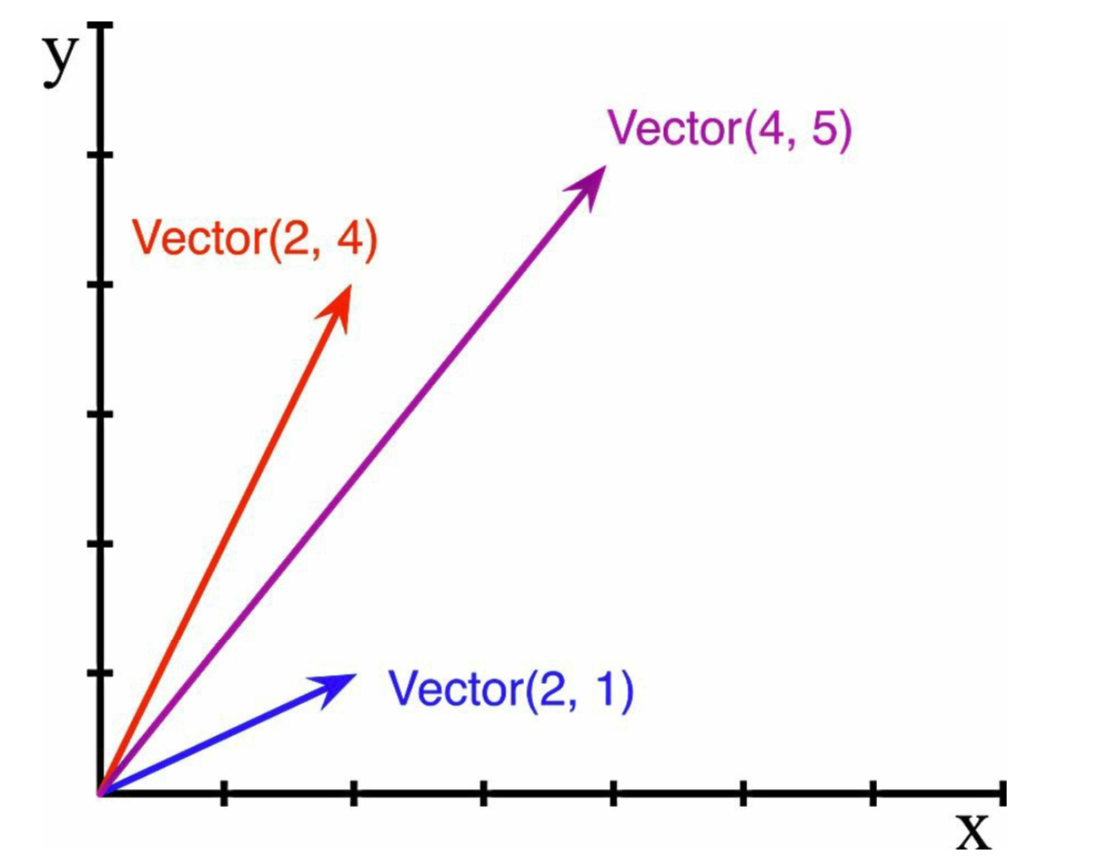

In [ ]:
from math import hypot

class Vector:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)

    def __abs__(self):
        return hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

# 使用 + 运算符
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v1 + v2

# 调用 abs 内置函数
v = Vector(3, 4)
abs(v)

# 使用 * 运算符
v * 3

Vector 类中 6 个方法（除 `__init__` 外）并不会在类自身的代码中调用。一般只有解释器会频繁调用这些方法

### 字符串的表示形式

内置函数 repr， 通过 `__repr__` 特殊方法来得到一个对象的字符串表示形式。

### 算数运算符

通过 `__add__`, `__mul__`， 向量类能够操作 + 和 * 两个算数运算符。
> 运算符操作对象不发生改变，返回一个产生的新值

### 自定义的布尔值

- 任何对象可用于需要布尔值的上下文中（if, while 语句， and, or, not 运算符）
- Python 调用 bool(x) 判定一个值 x，bool(x) 只能返回 True 或者 False
- 如果类没有实现 `__bool__`，则调用 `__len__`， 若返回 0，则 bool 返回 False

## 特殊方法一览

[Reference](https://docs.python.org/3/reference/datamodel.html)

## 为何 len 不是普通方法

> “实用胜于纯粹“
> ---
> *The Zen of Python*

为了让 Python 自带的数据结构走后门, CPython 会直接从结构体读取对象的长度,而不会调用方法.
这种处理方式在保持内置类型的效率和语言一致性保持了一个平衡.

## 小结

- 通过实现特殊方法，自定义数据类型可以像内置类型一样处理
- 合理的字符串表示形式是Python对象的基本要求。`__repr__`, `__str__`
- 序列类型的模拟是特殊方法最常用的地方
